# Exploring the Data

## Objectives

* Fetch data from [Kaggle](https://www.kaggle.com/datasets/codeinstitute/housing-prices-data) and save as raw data.

* Load and perform an initial inspection of the two datasets provided for this project:
    - Raw main Ames Housing dataset (house_prices_records.csv).
    - Client's 4 inherited houses (inherited_houses.csv).

* Understand the structure of each dataset, including column names, data types, and dimensions.

* Identify the presence and scale of missing data across all features in the main dataset.

* Verify that the inherited houses dataset contains the correct features for later prediction.

* Generate descriptive statistics to understand the distribution, spread, and potential outliers in numerical variables.

* Highlight key data quality issues that will need to be addressed during the cleaning stage.

* Ensure both datasets are suitable for further stages such as cleaning, modelling, and prediction.

## Inputs

* Datasets: 
   - house_prices_records.csv located in the data/raw/ directory.
   - inherited_houses.csv located in the data/raw/ directory.

* Libraries: pandas, numpy (used for DataFrame exploration and missing-value analysis).

* all data is loaded directly from the CSV file.

## Outputs

* A preview of both datasets using .head().
*  Structural summaries using `.info()` for:
   - house_prices_records.csv
   - inherited_houses.csv
* Missing-value summary for the main dataset, presented as:
   - Total missing values
   - Missing values per column
   - Percentage of missing values per column
* Statistical summary tables for numerical columns using `.describe().T`.
* A clear list of issues that require cleaning before modelling.


## Additional Comments

* The inherited_houses.csv dataset does **not** include `SalePrice`, as these values must be predicted later using the trained model.
* It is important to confirm that the inherited_houses.csv dataset has the same feature structure as the cleaned training dataset. Any missing or mismatched columns may cause errors during prediction.
* Insights from this notebook directly inform the cleaning decisions in the next stage `02_data_cleaning.ipynb` and help justify those choices in the final report.

---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [29]:
import os
current_dir = os.getcwd()
current_dir


'/Users/aisha/Desktop/vscode-projects'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [19]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [20]:
current_dir = os.getcwd()
current_dir

'/Users/aisha/Desktop/vscode-projects'

---

# Check Structure and Missing Data


- Understand the data structure
- Check for missing values

### Data Structure 

In [10]:
import pandas as pd

# Load the main dataset
df = pd.read_csv("data/raw/house_prices_records.csv")
df.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000


- The dataset contains various numerical and categorical features such as floor area, basement quality, and garage information.

- Some missing values (`NaN`) are visible in certain columns 

In [4]:
# Check overall data structure 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1460 non-null   int64  
 1   2ndFlrSF       1374 non-null   float64
 2   BedroomAbvGr   1361 non-null   float64
 3   BsmtExposure   1422 non-null   object 
 4   BsmtFinSF1     1460 non-null   int64  
 5   BsmtFinType1   1315 non-null   object 
 6   BsmtUnfSF      1460 non-null   int64  
 7   EnclosedPorch  136 non-null    float64
 8   GarageArea     1460 non-null   int64  
 9   GarageFinish   1225 non-null   object 
 10  GarageYrBlt    1379 non-null   float64
 11  GrLivArea      1460 non-null   int64  
 12  KitchenQual    1460 non-null   object 
 13  LotArea        1460 non-null   int64  
 14  LotFrontage    1201 non-null   float64
 15  MasVnrArea     1452 non-null   float64
 16  OpenPorchSF    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  OverallQ

- The dataset has 1,460 entries and 24 columns.
- There is a mix of numeric (`int64`, `float64`) and categorical (`object`) data types.
- Some columns e.g., `2ndFlrSF`, `GarageYrBlt`, `MasVnrArea`, `LotFrontage` can be seen to have less than 1,460 non-null values, confirming the presence of missing data.

In [23]:
# Identify categorical columns in the main dataset
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols

Index(['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual'], dtype='object')

In [26]:
# Inspect the actual categorical columns present in the main dataset
for col in ['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual']:
    print(f"\nColumn: {col}")
    print(df[col].value_counts().head)


Column: BsmtExposure
<bound method NDFrame.head of BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64>

Column: BsmtFinType1
<bound method NDFrame.head of BsmtFinType1
Unf    396
GLQ    385
ALQ    202
BLQ    136
Rec    126
LwQ     70
Name: count, dtype: int64>

Column: GarageFinish
<bound method NDFrame.head of GarageFinish
Unf    546
RFn    366
Fin    313
Name: count, dtype: int64>

Column: KitchenQual
<bound method NDFrame.head of KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: count, dtype: int64>


#### Overview of Categorical Features in the main dataset

* The main dataset contains four categorical (object-type) columns: 
   - BsmtExposure – level of basement exposure
   - BsmtFinType1 – basement finish type
   - GarageFinish – interior finish of the garage
   - KitchenQual – quality of the kitchen

* These features are important because categorical variables often require encoding before modelling. To better understand their distributions, we inspect the most common categories for each of these features.

In [29]:
# Summary statistics for numerical features in the main dataset
num_summary = df.select_dtypes(include=['number']).describe().T
num_summary

,count,mean,std,min,25%,50%,75%,max
1stFlrSF,1460.0,1162.626712,386.587738,334.0,882.00,1087.0,1391.25,4692.0
2ndFlrSF,1374.0,348.524017,438.865586,0.0,0.00,0.0,728.00,2065.0
BedroomAbvGr,1361.0,2.869214,0.820115,0.0,2.00,3.0,3.00,8.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0
EnclosedPorch,136.0,25.330882,66.684115,0.0,0.00,0.0,0.00,286.0
GarageArea,1460.0,472.980137,213.804841,0.0,334.50,480.0,576.00,1418.0
GarageYrBlt,1379.0,1978.506164,24.689725,1900.0,1961.00,1980.0,2002.00,2010.0
GrLivArea,1460.0,1515.463699,525.480383,334.0,1129.50,1464.0,1776.75,5642.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0


### Missing data 

In [5]:
# See how many missing values are in the dataset
df.isna().sum().sum()

np.int64(3580)

- There are 3,580 missing values in total, mainly in columns such as EnclosedPorch, WoodDeckSF, and LotFrontage. These will need to be handled before modelling.

In [6]:
# Count missing values per column
df.isna().sum().sort_values(ascending=False)

EnclosedPorch    1324
WoodDeckSF       1305
LotFrontage       259
GarageFinish      235
BsmtFinType1      145
BedroomAbvGr       99
2ndFlrSF           86
GarageYrBlt        81
BsmtExposure       38
MasVnrArea          8
1stFlrSF            0
OverallCond         0
YearRemodAdd        0
YearBuilt           0
TotalBsmtSF         0
OverallQual         0
KitchenQual         0
OpenPorchSF         0
LotArea             0
GrLivArea           0
GarageArea          0
BsmtUnfSF           0
BsmtFinSF1          0
SalePrice           0
dtype: int64

- Shows counts of how many missing (NaN) values there are in each column 

In [7]:
# Count missing values per column
missing_count = df.isna().sum().sort_values(ascending=False)

# Percentage of missing values
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_data = pd.DataFrame({
    'Missing Values': missing_count,
    'Percentage (%)': missing_percent
})
print(missing_data)


               Missing Values  Percentage (%)
1stFlrSF                    0        0.000000
2ndFlrSF                   86        5.890411
BedroomAbvGr               99        6.780822
BsmtExposure               38        2.602740
BsmtFinSF1                  0        0.000000
BsmtFinType1              145        9.931507
BsmtUnfSF                   0        0.000000
EnclosedPorch            1324       90.684932
GarageArea                  0        0.000000
GarageFinish              235       16.095890
GarageYrBlt                81        5.547945
GrLivArea                   0        0.000000
KitchenQual                 0        0.000000
LotArea                     0        0.000000
LotFrontage               259       17.739726
MasVnrArea                  8        0.547945
OpenPorchSF                 0        0.000000
OverallCond                 0        0.000000
OverallQual                 0        0.000000
SalePrice                   0        0.000000
TotalBsmtSF                 0     

-  The table above identifies and quantifies missing data in the dataset. It calculates the percentage of missing entries relative to the total dataset size.

-  Displaying both counts and % helps highlight which columns have minimal missing data that can be filled and which columns have excessive missing data that may need to be removed.


In [8]:
# Filter out columns with no missing values to show the top 10 columns with actuall missing values 
missing_data = missing_data[missing_data["Missing Values"] > 0].sort_values(by="Percentage (%)", ascending=False)
print(missing_data)

               Missing Values  Percentage (%)
EnclosedPorch            1324       90.684932
WoodDeckSF               1305       89.383562
LotFrontage               259       17.739726
GarageFinish              235       16.095890
BsmtFinType1              145        9.931507
BedroomAbvGr               99        6.780822
2ndFlrSF                   86        5.890411
GarageYrBlt                81        5.547945
BsmtExposure               38        2.602740
MasVnrArea                  8        0.547945


-  This filters and displays the top columns with missing data in the dataset.

-  It removes features with no missing values and sorts the rest in descending order by their percentage of missing data.

-  This helps focus only on columns that require attention during data cleaning, making it easier to decide whether to fill or drop them.

In [11]:
# Generate statistical summary of numerical columns in main dataset

# Returns summary statistics for each numeric feature - count, mean, std dev, min/max values, and quartiles 
df.select_dtypes(include=['number']).describe().T

,count,mean,std,min,25%,50%,75%,max
1stFlrSF,1460.0,1162.626712,386.587738,334.0,882.00,1087.0,1391.25,4692.0
2ndFlrSF,1374.0,348.524017,438.865586,0.0,0.00,0.0,728.00,2065.0
BedroomAbvGr,1361.0,2.869214,0.820115,0.0,2.00,3.0,3.00,8.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0
EnclosedPorch,136.0,25.330882,66.684115,0.0,0.00,0.0,0.00,286.0
GarageArea,1460.0,472.980137,213.804841,0.0,334.50,480.0,576.00,1418.0
GarageYrBlt,1379.0,1978.506164,24.689725,1900.0,1961.00,1980.0,2002.00,2010.0
GrLivArea,1460.0,1515.463699,525.480383,334.0,1129.50,1464.0,1776.75,5642.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0



#### Summary Statistics — Interpretation

| **Feature Category** | **Key Findings**                                                                                                  | **Implications**                                         |
| -------------------- | ----------------------------------------------------------------------------------------------------------------- | -------------------------------------------------------- |
| Scale Variations     | • LotArea: `1,300` - `215,245` sq ft<br>• BedroomAbvGr: `0-8`                                                     | Need for feature scaling/normalisation before modeling   |
| Missing Values       | • EnclosedPorch: `136` valid entries<br>• WoodDeckSF: `155` valid entries<br>• LotFrontage: `1,201` valid entries | Required: Systematic missing value imputation strategy   |
| Outliers             | • GrLivArea: Max `5,642` vs Median `1,464`<br>• LotArea: Max `215,245` vs Median `9,478`                          | May need outlier handling (winsorisation/transformation) |
| Target Variable      | • Range: `$34,900` - `$755,000`<br>• Median: `$163,000`                                                           | Consider log transformation due to skewed distribution   |


- These statistics reveal important characteristics of the Ames Housing dataset that will guide our data preprocessing and modeling decisions. The varying scales across features suggest the need for normalisation, while missing values indicate required data cleaning steps. The presence of outliers in living area and lot size measurements suggests potential luxury properties or measurement anomalies that may need special consideration in our analysis.

### Key Interpretations 

- Some variables (e.g., LotArea, GrLivArea, TotalBsmtSF) have values in the 1000s whilst others (like BedroomAbvGr, OverallQual, OverallCond) range from 1 to 10.
- Several features have a minimum value of 0, meaning these properties do not have that feature at all but this is normal for housing data e.g. for 2ndFlrSF, many homes have no second floor. Later we must check if these zeros represent real absence, or missing data encoded as zero. 
- Some features show a large differece between mean and max which suggests that outliers exist.
- The count for most features are close to the max dataset size (1460) which shows the dataset is mostly complete. 
- Distribution insights:
   - Features like OverallQual and OverallCond have a small numeric range (1–10).
   - Area-based features (e.g., TotalBsmtSF, GarageArea, GrLivArea) show significant spread, which often correlates strongly with SalePrice.


In [30]:
# Check if there are any completely blank rows in the main dataset
blank_rows_main = df.isna().all(axis=1).sum()
blank_rows_main

np.int64(0)

* The output shows `0` blank rows so every row contains some valid data. This confirms the main dataset is intact and suitable for cleaning. 

### Outlier Detection

In [35]:
# Select important numerical features to check for outliers using the IQR method 

features_to_check = [
    'GrLivArea',
    'LotArea',
    'TotalBsmtSF',
    'GarageArea',
    '1stFlrSF',
    '2ndFlrSF',
    'SalePrice'
]

outlier_results = {}

for feature in features_to_check:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]

    outlier_results[feature] = {
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Number of Outliers": outliers.count(),
        "Outlier Values": outliers.values
    }

outlier_results


{'GrLivArea': {'Lower Bound': np.float64(158.625),
  'Upper Bound': np.float64(2747.625),
  'Number of Outliers': np.int64(31),
  'Outlier Values': array([2945, 3222, 3608, 3112, 2794, 3493, 2978, 3228, 4676, 2775, 3194,
         3395, 4316, 3279, 3140, 2822, 2872, 2898, 3082, 2868, 2828, 3627,
         3086, 2872, 4476, 3447, 5642, 2810, 2792, 3238, 2784])},
 'LotArea': {'Lower Bound': np.float64(1481.5),
  'Upper Bound': np.float64(17673.5),
  'Number of Outliers': np.int64(69),
  'Outlier Values': array([ 50271,  19900,  21000,  21453,  19378,  31770,  22950,  25419,
         159000,  19296,  39104,  19138,  18386, 215245, 164660,  20431,
          18800,  53107,  34650,  22420,  21750,  70761,  53227,  40094,
          32668,  21872,  21780,  25095,  46589,  20896,  18450,  21535,
          26178, 115149,  21695,  53504,  21384,  28698,  45600,  17920,
          25286,  27650,  24090,  25000,   1300,  21286,   1477,  21750,
          29959,  18000,  23257,  17755,  35760,  18030,  

#### Summary table for outliers in numerical features:

|   Feature   |                           Outliers                          |                                     Interpretation                                    |
|:-----------:|:-----------------------------------------------------------:|:-------------------------------------------------------------------------------------:|
| GrLivArea   | Homes with 3,000–5,600+ sq ft                               | Large / luxury living areas far above the typical median (~1,464 sq ft).              |
|   LotArea   |    Extremely large plots from 20,000 up to 215,000 sq ft    | Very large lots, semi-rural properties, corner plots - genuine variation, not errors. |
| TotalBsmtSF | Basements reaching 2,000–3,000+ sq ft                       | Homes with large or fully finished basements.                                         |
| GarageArea  | Large garage areas, often for multi-car or extended garages | Expected in newer or high-value homes.                                                |
| 1stFlrSF    | High-end ground floor areas                                 | Reflects bigger or luxury property footprints.                                        |
| 2ndFlrSF    | Large second floors                                         | Typical for multi-storey homes; may reflect new builds or modern designs.             |
| SalePrice   | High-value homes from $400k up to $755k                     | Strong right-skew: luxury properties with significantly higher prices.                |

* The outlier analysis reveals that many numerical features, particularly those related to house size and sale price, contain meaningful extreme values that reflect the real variation in the Ames housing market. These outliers are valid and should remain in the dataset; however, they highlight the need for:
   - transformation, scaling, and consideration of model robustness during the cleaning and modelling phase.
* The outliers represent legitimate large or high-value properties rather than data errors, highlighting the right-skewed nature of the housing market.
* This insight directly informs the decisions during data cleaning.

---

# Exploring the Clients 4 Inherited Houses Dataset 

* The client provided this dataset containing 4 inherited properties for which we will later predict sale prices. Before using these values in the modelling stage, we must inspect and validate the structure, completeness, and consistency of this dataset.

* This ensures the inherited houses can safely be passed into the trained model without causing errors.

* As part of the business requirements, the client wants to estimate the sale prices of four inherited properties. These values will be predicted by the machine learning model trained on the main Ames Housing dataset.

* Before we can make predictions, it is important to:
   - Load and inspect the inherited houses dataset - inherited_houses.csv
   - Confirm the structure matches the cleaned training dataset
   - Check for missing values or inconsistencies
   - Verify that all required model features are present

### Data Structure

In [16]:
# Load the inherited houses dataset
inherited = pd.read_csv("data/raw/inherited_houses.csv")

# Show the first few rows
inherited.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd
0,896,0,2,No,468.0,Rec,270.0,0,730.0,Unf,...,11622,80.0,0.0,0,6,5,882.0,140,1961,1961
1,1329,0,3,No,923.0,ALQ,406.0,0,312.0,Unf,...,14267,81.0,108.0,36,6,6,1329.0,393,1958,1958
2,928,701,3,No,791.0,GLQ,137.0,0,482.0,Fin,...,13830,74.0,0.0,34,5,5,928.0,212,1997,1998
3,926,678,3,No,602.0,GLQ,324.0,0,470.0,Fin,...,9978,78.0,20.0,36,6,6,926.0,360,1998,1998


In [17]:
# Check the structure and data types of the inherited houses dataset
inherited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       4 non-null      int64  
 1   2ndFlrSF       4 non-null      int64  
 2   BedroomAbvGr   4 non-null      int64  
 3   BsmtExposure   4 non-null      object 
 4   BsmtFinSF1     4 non-null      float64
 5   BsmtFinType1   4 non-null      object 
 6   BsmtUnfSF      4 non-null      float64
 7   EnclosedPorch  4 non-null      int64  
 8   GarageArea     4 non-null      float64
 9   GarageFinish   4 non-null      object 
 10  GarageYrBlt    4 non-null      float64
 11  GrLivArea      4 non-null      int64  
 12  KitchenQual    4 non-null      object 
 13  LotArea        4 non-null      int64  
 14  LotFrontage    4 non-null      float64
 15  MasVnrArea     4 non-null      float64
 16  OpenPorchSF    4 non-null      int64  
 17  OverallCond    4 non-null      int64  
 18  OverallQual   

#### Structure Check

- The dataset contains 4 rows, as expected.
- All columns align with the main dataset with the exception of `SalePrice`.
- Data types are consistent with those in the main dataset.
- No unexpected or extra columns appear.

#### Structure of the Inherited Houses Dataset

The `.info()` summary confirms that the inherited houses dataset contains 4 entries and 23 features. All columns have complete data (no missing values), and the data types are consistent with the main Ames Housing dataset. Numerical features such as `GrLivArea`, `LotArea`, `YearBuilt`, and `TotalBsmtSF` appear as `int64` or `float64`, while categorical features such as `KitchenQual`, `GarageFinish`, and `BsmtFinType1` appear as `object` type.

This alignment is important because it ensures that the inherited houses can be passed into the machine learning model later. The only column missing compared to the main dataset is `SalePrice` which is expected, as these 4 houses are the ones for which we will generate price predictions.

In [27]:
# Identify categorical columns in the inherited dataset
cat_cols_inherited = inherited.select_dtypes(include=['object']).columns
cat_cols_inherited

Index(['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual'], dtype='object')

In [28]:
# Inspect categorical values in the inherited dataset
for col in ['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual']:
    print(f"\nColumn: {col}")
    print(inherited[col].value_counts())


Column: BsmtExposure
BsmtExposure
No    4
Name: count, dtype: int64

Column: BsmtFinType1
BsmtFinType1
GLQ    2
Rec    1
ALQ    1
Name: count, dtype: int64

Column: GarageFinish
GarageFinish
Unf    2
Fin    2
Name: count, dtype: int64

Column: KitchenQual
KitchenQual
TA    2
Gd    2
Name: count, dtype: int64


* To ensure compatibility with the machine learning model, we inspect the categorical features in the inherited houses dataset. The dataset contains the same four categorical columns as the main dataset:
   - BsmtExposure
   - BsmtFinType1
   - GarageFinish
   - KitchenQual

* All categories match the expected values found in the main dataset, meaning the model will be able to encode and process these inputs without errors.

In [31]:
# Summary statistics for numerical features in inherited houses
inherited_num_summary = inherited.select_dtypes(include=['number']).describe().T
inherited_num_summary

,count,mean,std,min,25%,50%,75%,max
1stFlrSF,4.0,1019.75,206.685550,896.0,918.50,927.0,1028.25,1329.0
2ndFlrSF,4.0,344.75,398.193734,0.0,0.00,339.0,683.75,701.0
BedroomAbvGr,4.0,2.75,0.500000,2.0,2.75,3.0,3.00,3.0
BsmtFinSF1,4.0,696.00,201.141741,468.0,568.50,696.5,824.00,923.0
BsmtUnfSF,4.0,284.25,112.973079,137.0,236.75,297.0,344.50,406.0
EnclosedPorch,4.0,0.00,0.000000,0.0,0.00,0.0,0.00,0.0
GarageArea,4.0,498.50,172.683719,312.0,430.50,476.0,544.00,730.0
GarageYrBlt,4.0,1978.50,21.977261,1958.0,1960.25,1979.0,1997.25,1998.0
GrLivArea,4.0,1364.50,340.623448,896.0,1220.75,1466.5,1610.25,1629.0
LotArea,4.0,12424.25,1999.967062,9978.0,11211.00,12726.0,13939.25,14267.0


|        Feature Category       |                                                      Key Findings                                                     |                                               Implications                                              |
|:-----------------------------:|:---------------------------------------------------------------------------------------------------------------------:|:-------------------------------------------------------------------------------------------------------:|
| Scale Consistency             |  Numerical features fall within normal ranges seen in the main dataset (e.g., GrLivArea 896–1629, LotArea 9978–14267) | Inherited houses can safely be fed into the trained model without rescaling or adjusting feature ranges |
|         Missing Values        |              All numerical features have a count of 4 (complete data),  No missing or zero-only anomalies             |                     No imputation required; dataset is fully complete for prediction                    |
| Zeros Represent  Real Absence | Zeros in features like 2ndFlrSF, EnclosedPorch, MasVnrArea are expected (feature not present)                         | No cleaning needed; zeros do not indicate missing data                                                  |
| Outliers                      | No extreme values relative to the main dataset, All min/max values fall within reasonable bounds                      | Outlier handling not required for the inherited dataset                                                 |


* These statistics confirm that the inherited houses are structurally similar to the properties in the main Ames Housing dataset. The numeric values fall within expected ranges and do not show irregularities that would require cleaning, scaling, or outlier removal.

### Missing Data 

In [18]:
# Check for missing values in the inherited dataset
inherited.isna().sum().sort_values(ascending=False)

1stFlrSF         0
KitchenQual      0
YearBuilt        0
WoodDeckSF       0
TotalBsmtSF      0
OverallQual      0
OverallCond      0
OpenPorchSF      0
MasVnrArea       0
LotFrontage      0
LotArea          0
GrLivArea        0
2ndFlrSF         0
GarageYrBlt      0
GarageFinish     0
GarageArea       0
EnclosedPorch    0
BsmtUnfSF        0
BsmtFinType1     0
BsmtFinSF1       0
BsmtExposure     0
BedroomAbvGr     0
YearRemodAdd     0
dtype: int64

#### Missing Values in the Inherited Houses Dataset

The missing values check shows that all features contain 0 missing values. This means the inherited houses dataset is already complete and does not require any cleaning for missing entries.

This is important because the machine learning model we build later expects a full set of input features. Since all values are present, the inherited houses can be safely used in the prediction stage once the model is trained on the cleaned main dataset.

In [19]:
# Check if there are any completely blank rows in the dataset
blank_rows_inherited = inherited.isna().all(axis=1).sum()
blank_rows_inherited

np.int64(0)

* The result of this check is `0`, meaning there are no rows in the inherited houses dataset where all values are missing. This confirms that the dataset does not contain any fully empty or corrupted rows, and therefore no removals are needed before cleaning or modelling.

### Outlier detection

In [36]:
# Outlier detection using IQR method for inherited houses using the same key features as the main dataset

features_to_check = [
    'GrLivArea',
    'LotArea',
    'TotalBsmtSF',
    'GarageArea',
    '1stFlrSF',
    '2ndFlrSF'
]

inherited_outliers = {}

for feature in features_to_check:
    Q1 = inherited[feature].quantile(0.25)
    Q3 = inherited[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = inherited[(inherited[feature] < lower_bound) | (inherited[feature] > upper_bound)][feature]

    inherited_outliers[feature] = {
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Number of Outliers": outliers.count(),
        "Outlier Values": outliers.values
    }

inherited_outliers

{'GrLivArea': {'Lower Bound': np.float64(636.5),
  'Upper Bound': np.float64(2194.5),
  'Number of Outliers': np.int64(0),
  'Outlier Values': array([], dtype=int64)},
 'LotArea': {'Lower Bound': np.float64(7118.625),
  'Upper Bound': np.float64(18031.625),
  'Number of Outliers': np.int64(0),
  'Outlier Values': array([], dtype=int64)},
 'TotalBsmtSF': {'Lower Bound': np.float64(745.125),
  'Upper Bound': np.float64(1198.125),
  'Number of Outliers': np.int64(1),
  'Outlier Values': array([1329.])},
 'GarageArea': {'Lower Bound': np.float64(260.25),
  'Upper Bound': np.float64(714.25),
  'Number of Outliers': np.int64(1),
  'Outlier Values': array([730.])},
 '1stFlrSF': {'Lower Bound': np.float64(753.875),
  'Upper Bound': np.float64(1192.875),
  'Number of Outliers': np.int64(1),
  'Outlier Values': array([1329])},
 '2ndFlrSF': {'Lower Bound': np.float64(-1025.625),
  'Upper Bound': np.float64(1709.375),
  'Number of Outliers': np.int64(0),
  'Outlier Values': array([], dtype=int64)}

* To ensure the inherited houses can be safely used during prediction, we applied the same IQR-based outlier detection used for the main dataset. Unlike the main dataset which is large, the inherited dataset has only 4 properties. Therefore, the purpose of this analysis is not to remove or transform outliers, but to verify that none of the inherited houses contain extreme or abnormal values that fall outside the model's expected ranges.
* Across the selected features: GrLivArea, LotArea, TotalBsmtSF, GarageArea, 1stFlrSF, and 2ndFlrSF - the results show:
   - Most features contain 0 outliers
   - A few features (e.g. TotalBsmtSF, GarageArea, 1stFlrSF) show 1 mild outlier, but these values are realistic and fall well within the structural ranges learned from the main dataset
   - No values appear extreme, unrealistic, or outside typical property ranges
* These findings confirm that all four inherited homes are structurally consistent with the homes in the main dataset. Therefore; No outlier removal or transformation is required, inherited dataset should remain unchanged and the data is safe to use for prediction once preprocessing is applied

---

# Correlation Analysis 

* Correlation analysis is performed to understand how numerical features relate to one another and to identify which attributes are most strongly associated with SalePrice. This helps guide feature selection and informs how we prepare the data for modelling.

* We compute the Pearson correlation matrix for all numerical variables and visualise the results using a heatmap. This highlights areas where variables are strongly positively or negatively correlated.

* Correlation analysis directly influences cleaning decisions by:
   - Identifying redundant or noisy features
   - Shows weak or irrelevant features
   - Features with very low correlation to SalePrice may not be useful.
   - Supports transformations
   - Helps detect data issues

* Unexpected negative correlations or extremely low correlations may indicate encoding issues or mis-typed variables.

### Main Ames dataset

In [37]:
# Calculate correlations for numerical features in house_prices_records.csv dataset 
corr_matrix = df.corr(numeric_only=True)

corr_matrix

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageYrBlt,GrLivArea,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
1stFlrSF,1.000000,-0.198648,0.124773,0.445863,0.317987,-0.122797,0.489782,0.233449,0.566024,0.299475,0.457181,0.344501,0.211671,-0.144203,0.476224,0.819530,0.186008,0.281986,0.240379,0.605852
2ndFlrSF,-0.198648,1.000000,0.498970,-0.131872,0.003019,0.101974,0.139687,0.068659,0.688596,0.052349,0.083841,0.171588,0.204716,0.022789,0.295348,-0.169066,0.021157,0.013235,0.138141,0.322335
BedroomAbvGr,0.124773,0.498970,1.000000,-0.101497,0.154381,0.180596,0.056957,-0.054573,0.515925,0.109509,0.253001,0.109723,0.085108,0.012049,0.090841,0.044476,0.006725,-0.069358,-0.033039,0.161901
BsmtFinSF1,0.445863,-0.131872,-0.101497,1.000000,-0.495251,-0.069979,0.296970,0.153484,0.208171,0.214103,0.233633,0.264736,0.111761,-0.046231,0.239666,0.522396,0.261170,0.249503,0.128451,0.386420
BsmtUnfSF,0.317987,0.003019,0.154381,-0.495251,1.000000,-0.140879,0.183303,0.190708,0.240257,-0.002618,0.132644,0.114442,0.129005,-0.136841,0.308159,0.415360,-0.100957,0.149040,0.181133,0.214479
EnclosedPorch,-0.122797,0.101974,0.180596,-0.069979,-0.140879,1.000000,-0.146742,-0.316280,-0.009422,-0.019596,0.038386,-0.139150,-0.154954,-0.022404,-0.227201,-0.214988,-0.184935,-0.397390,-0.159601,-0.176458
GarageArea,0.489782,0.139687,0.056957,0.296970,0.183303,-0.146742,1.000000,0.564567,0.468997,0.180403,0.344997,0.373066,0.241435,-0.151521,0.562022,0.486665,0.082697,0.478954,0.371600,0.623431
GarageYrBlt,0.233449,0.068659,-0.054573,0.153484,0.190708,-0.316280,0.564567,1.000000,0.231197,-0.024947,0.070250,0.252691,0.228425,-0.324297,0.547766,0.322445,0.226765,0.825667,0.642277,0.486362
GrLivArea,0.566024,0.688596,0.515925,0.208171,0.240257,-0.009422,0.468997,0.231197,1.000000,0.263116,0.402797,0.390857,0.330224,-0.079686,0.593007,0.454868,0.155426,0.199010,0.287389,0.708624
LotArea,0.299475,0.052349,0.109509,0.214103,-0.002618,-0.019596,0.180403,-0.024947,0.263116,1.000000,0.426095,0.104160,0.084774,-0.005636,0.105806,0.260833,0.057006,0.014228,0.013788,0.263843


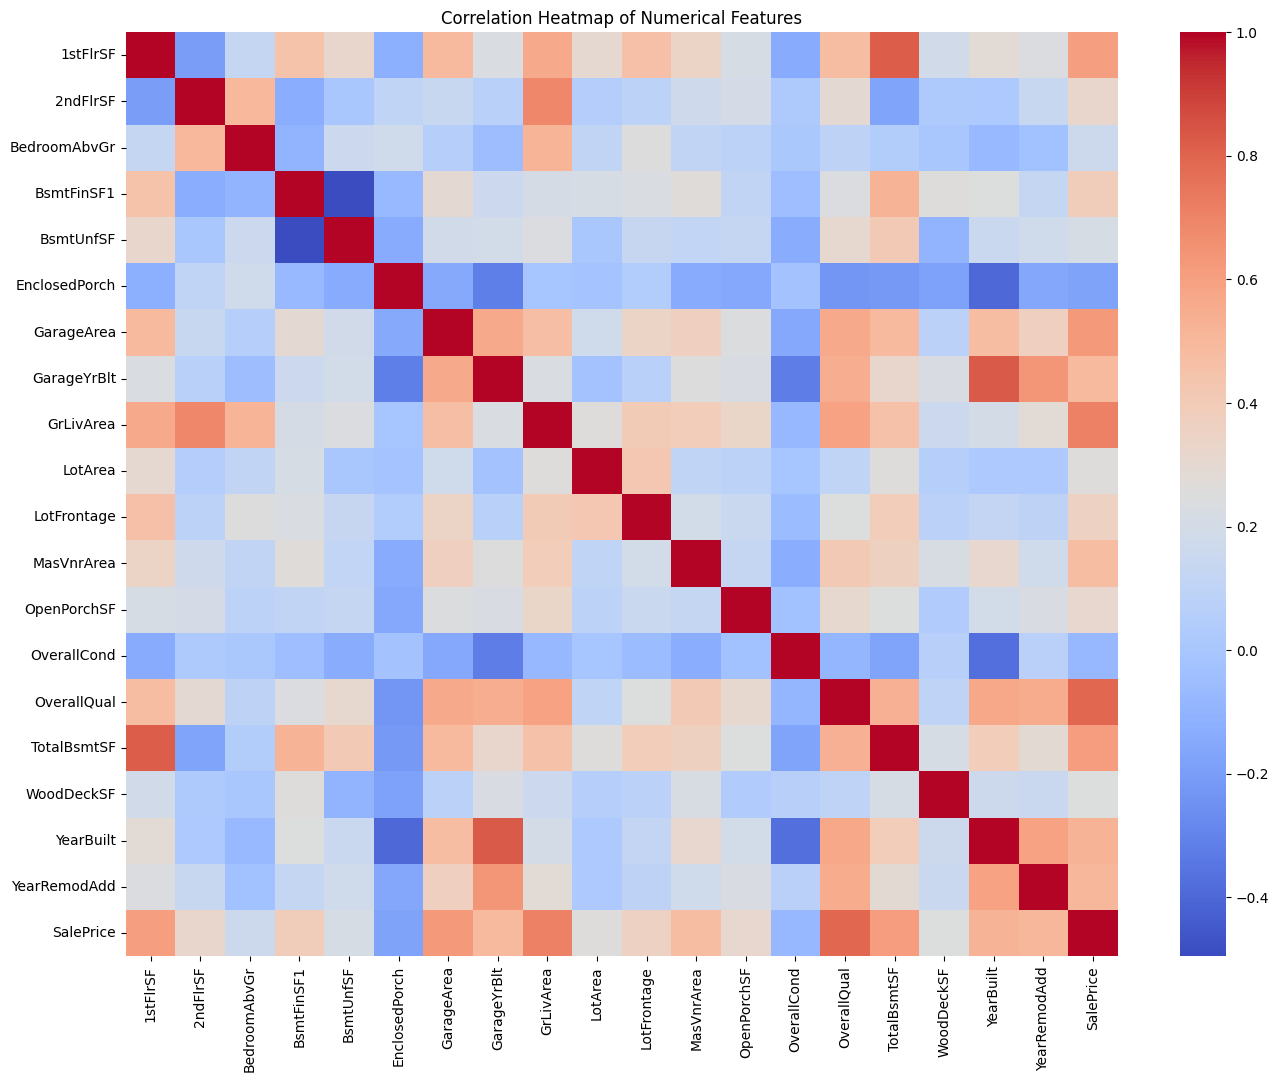

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

* Overall, the correlation analysis confirms that house quality, internal floor area (above ground and basement), garage size, and build/remodel year are the strongest drivers of SalePrice, while some features such as bedrooms, enclosed porch area, and overall condition have weaker relationships and may be deprioritised during feature selection.

* The heatmap uses colour intensity to show the strength of relationships between numerical features: 
   - Darker red areas represent strong positive correlations, meaning the two features increase together
   - Darker blue areas represent strong negative correlations, meaning one increases as the other decreases. 
   - Lighter colours near white indicate weak or no relationship. 
   
* This visual overview helps quickly identify which variables are most strongly linked to SalePrice.

* The heatmap also highlights strong correlations between predictor variables themselves (e.g. 1stFlrSF and TotalBsmtSF, or YearBuilt and GarageYrBlt), which suggests potential multicollinearity. This will guide decisions later in data cleaning, such as dropping redundant features or applying regularisation methods.

In [40]:
# Show top correlated numerical features with sale price 
saleprice_corr = corr_matrix['SalePrice'].sort_values(ascending=False)
saleprice_corr

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
BsmtFinSF1       0.386420
LotFrontage      0.351799
2ndFlrSF         0.322335
OpenPorchSF      0.315856
LotArea          0.263843
WoodDeckSF       0.252027
BsmtUnfSF        0.214479
BedroomAbvGr     0.161901
OverallCond     -0.077856
EnclosedPorch   -0.176458
Name: SalePrice, dtype: float64

* The values show which numerical features have the strongest influence on house prices. 

* The most predictive variables are OverallQual, GrLivArea, GarageArea, TotalBsmtSF, and 1stFlrSF, which all display strong positive relationships with SalePrice. This confirms that property quality and internal living space are the primary drivers of value in the dataset.

* Features such as BedroomAbvGr, BsmtUnfSF, OverallCond, and EnclosedPorch have very weak or negative correlations, indicating that they contribute little to price prediction and may be deprioritised during feature selection.


* The features with negative correlations (such as OverallCond and EnclosedPorch) show that increasing values in these features are associated with a slight decrease in SalePrice. However, the negative values in this dataset are very close to 0, meaning the relationship is extremely weak and not meaningful. These features contribute little to predicting house prices and may be deprioritised during feature selection.

### Inherited houses dataset 

In [43]:
# # Calculate correlations for features in inherited_houses.csv dataset 
inherited_corr = inherited.corr(numeric_only=True)
inherited_corr

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageYrBlt,GrLivArea,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd
1stFlrSF,1.000000,-0.517934,0.399157,0.789862,0.702333,NaN,-0.767112,-0.565012,0.001314,0.620524,0.545583,0.986497,0.422838,0.295941,0.601972,0.999531,0.684463,-0.565012,-0.564440
2ndFlrSF,-0.517934,1.000000,0.577190,0.011915,-0.565162,NaN,-0.149742,0.997558,0.854739,-0.281746,-0.851460,-0.496521,0.553531,-0.596443,-0.016674,-0.491507,0.081791,0.997558,0.998208
BedroomAbvGr,0.399157,0.577190,1.000000,0.755686,0.084091,NaN,-0.893734,0.530852,0.916946,0.267421,-0.376867,0.413947,0.998579,-0.333333,0.577350,0.427049,0.755749,0.530852,0.531556
BsmtFinSF1,0.789862,0.011915,0.755686,1.000000,0.193059,NaN,-0.902154,-0.055725,0.493206,0.799376,-0.082976,0.727884,0.751053,-0.314869,0.381759,0.804201,0.601043,-0.055725,-0.047941
BsmtUnfSF,0.702333,-0.565162,0.084091,0.193059,1.000000,NaN,-0.422181,-0.563267,-0.234517,-0.100982,0.882347,0.798320,0.134671,0.868939,0.825348,0.695449,0.710593,-0.563267,-0.575586
EnclosedPorch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GarageArea,-0.767112,-0.149742,-0.893734,-0.902154,-0.422181,NaN,1.000000,-0.095649,-0.640523,-0.466053,-0.019018,-0.775774,-0.905703,0.063700,-0.718830,-0.786376,-0.877587,-0.095649,-0.095858
GarageYrBlt,-0.565012,0.997558,0.530852,-0.055725,-0.563267,NaN,-0.095649,1.000000,0.823318,-0.344547,-0.835355,-0.536804,0.508379,-0.561186,-0.026270,-0.539483,0.054957,1.000000,0.999827
GrLivArea,0.001314,0.854739,0.916946,0.493206,-0.234517,NaN,-0.640523,0.823318,1.000000,0.047160,-0.664317,0.018153,0.903659,-0.517678,0.345776,0.031922,0.510937,0.823318,0.824425
LotArea,0.620524,-0.281746,0.267421,0.799376,-0.100982,NaN,-0.466053,-0.344547,0.047160,1.000000,-0.091486,0.485400,0.245593,-0.468591,-0.174218,0.620892,0.040568,-0.344547,-0.329620


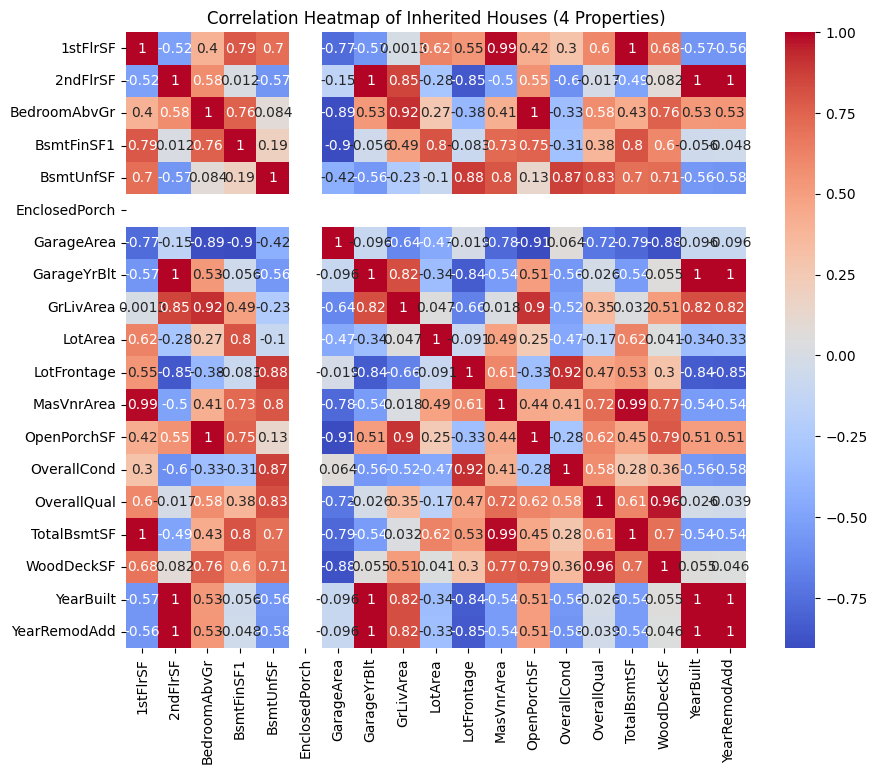

In [42]:
# Add correlation heatmap of inherited houses 
plt.figure(figsize=(10, 8))
sns.heatmap(inherited_corr, cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap of Inherited Houses (4 Properties)")
plt.show()

* The correlation matrix and heatmap above show how the numerical features in the inherited houses dataset relate to each other. The dataset contains only 4 properties, so the correlation coefficients are very unstable – small differences between houses can produce values close to –1 or +1. For this reason, the inherited correlations are used only to check structural consistency, not for feature selection.

* Features such as 1stFlrSF, TotalBsmtSF, MasVnrArea and WoodDeckSF are all highly positively correlated with each other.
   - Within the 4 homes, larger ground floor areas tend to come with larger basements and more external features, a normal pattern for bigger houses.

* YearBuilt, YearRemodAdd and GarageYrBlt are almost perfectly correlated (≈ 1.00), which is expected because garages are usually built or updated at the same time as the main house.

* 2ndFlrSF is also strongly positively correlated with the year variables, meaning that in this small sample, the newer homes tend to have more second-floor area.

* GarageArea is strongly negatively correlated with several size-related features, and LotFrontage has a strong negative relationship with GrLivArea and 2ndFlrSF.
    - With only 4 observations, these negative correlations do not indicate a data problem.

* All entries for EnclosedPorch are NaN in the correlation matrix because this feature has the same value for all 4 properties (likely all zero). When a column has no variation, the correlation is undefined, so the result shows as NaN. This is expected and not an error.


***Since there is no SalePrice column in the inherited dataset, these correlations are not used to judge predictive strength; they simply confirm that the inherited properties look structurally similar to normal homes and can safely be passed to the trained model after preprocessing.***

---

NOTE

* You may add as many sections as you want, as long as they support your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* If you do not need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create here your folder
  # os.makedirs(name='')
except Exception as e:
  print(e)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import streamlit

print("✅ Notebook connected to correct environment!")


✅ Notebook connected to correct environment!


In [2]:
import pandas as pd

# Load the main dataset
df = pd.read_csv("../data/raw/house_prices_records.csv")

# Quick check
print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
df.head()

✅ Dataset loaded successfully!
Shape: (1460, 24)


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000


In [3]:
df.isna().sum().sort_values(ascending=False).head(15)


EnclosedPorch    1324
WoodDeckSF       1305
LotFrontage       259
GarageFinish      235
BsmtFinType1      145
BedroomAbvGr       99
2ndFlrSF           86
GarageYrBlt        81
BsmtExposure       38
MasVnrArea          8
1stFlrSF            0
OverallCond         0
YearRemodAdd        0
YearBuilt           0
TotalBsmtSF         0
dtype: int64